In [373]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

In [374]:
df = pd.read_csv('income_evaluation.csv')

In [375]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [376]:
df.tail()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [377]:
df.shape

(32561, 15)

In [378]:
df.columns

Index(['age', ' workclass', ' fnlwgt', ' education', ' education-num',
       ' marital-status', ' occupation', ' relationship', ' race', ' sex',
       ' capital-gain', ' capital-loss', ' hours-per-week', ' native-country',
       ' income'],
      dtype='object')

In [379]:
df.rename(columns={
    'age':'Age',
    ' workclass':'Work class',
    ' fnlwgt':'Final-weight',
    ' education':'Education',
    ' education-num':'Education-Num',
    ' marital-status':'Marital-status',
    ' occupation':'Occupation',
    ' relationship':'Relationship',
    ' race':'Race',
    ' sex':'Gender',
    ' capital-gain':'Capital-gain',
    ' capital-loss':'Capital-loss',
    ' hours-per-week':'Hrs/Week',
    ' native-country':'Native-country',
    ' income':'Income'},inplace=True)

In [380]:
df.head()

,Age,Work class,Final-weight,Education,Education-Num,Marital-status,Occupation,Relationship,Race,Gender,Capital-gain,Capital-loss,Hrs/Week,Native-country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [381]:
df.value_counts('Work class')

Work class
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: count, dtype: int64

In [382]:
wc = []
for i in df['Work class']:
    if i != ' ?':
        wc.append(i)
    else:
        wc.append(None)


In [383]:
wc.count(None)

1836

In [384]:
df['Work class'] = wc

In [385]:
df.isna().sum()

Age                  0
Work class        1836
Final-weight         0
Education            0
Education-Num        0
Marital-status       0
Occupation           0
Relationship         0
Race                 0
Gender               0
Capital-gain         0
Capital-loss         0
Hrs/Week             0
Native-country       0
Income               0
dtype: int64

In [386]:
df.isnull().sum()

Age                  0
Work class        1836
Final-weight         0
Education            0
Education-Num        0
Marital-status       0
Occupation           0
Relationship         0
Race                 0
Gender               0
Capital-gain         0
Capital-loss         0
Hrs/Week             0
Native-country       0
Income               0
dtype: int64

In [387]:
df.dropna(inplace=True)

In [388]:
df.isna().sum()

Age               0
Work class        0
Final-weight      0
Education         0
Education-Num     0
Marital-status    0
Occupation        0
Relationship      0
Race              0
Gender            0
Capital-gain      0
Capital-loss      0
Hrs/Week          0
Native-country    0
Income            0
dtype: int64

In [389]:
df.shape

(30725, 15)

In [390]:
df.duplicated().sum()

24

In [391]:
df.drop_duplicates(inplace=True)

In [392]:
df.shape

(30701, 15)

In [393]:
df.value_counts('Work class')

Work class
 Private             22673
 Self-emp-not-inc     2540
 Local-gov            2093
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: count, dtype: int64

In [394]:
wc2 = []
for i in df['Work class']:
    if i == ' Private':
        wc2.append(1)
    elif i == ' Self-emp-not-inc':
        wc2.append(2)
    elif i == ' Local-gov':
        wc2.append(3)
    elif i == ' State-gov':
        wc2.append(4)
    elif i == ' Self-emp-inc':
        wc2.append(5)
    elif i == ' Federal-gov':
        wc2.append(6)
    elif i == ' Without-pay':
        wc2.append(7)
    elif i == ' Never-worked':
        wc2.append(8)
    else:
        wc2.append(i)

In [395]:
wc2

[4,
 2,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 4,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 2,
 1,
 1,
 6,
 1,
 1,
 3,
 1,
 1,
 1,
 3,
 1,
 1,
 6,
 4,
 1,
 1,
 1,
 1,
 2,
 1,
 2,
 1,
 1,
 1,
 6,
 1,
 1,
 4,
 1,
 1,
 1,
 1,
 6,
 5,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 5,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 3,
 1,
 1,
 1,
 1,
 1,
 1,
 3,
 1,
 1,
 6,
 1,
 1,
 1,
 1,
 3,
 3,
 2,
 1,
 1,
 6,
 1,
 1,
 2,
 1,
 1,
 5,
 1,
 3,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 5,
 3,
 1,
 1,
 1,
 1,
 1,
 4,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 6,
 2,
 1,
 1,
 1,
 5,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 3,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 5,
 1,
 2,
 1,
 6,
 4,
 1,
 3,
 1,
 4,
 1,
 1,
 4,
 1,
 1,
 1,
 1,
 1,
 3,
 1,
 1,
 1,
 6,
 1,
 2,
 1,
 4,
 1,
 1,
 3,
 1,
 6,
 1,
 1,
 6,
 1,
 2,
 1,
 1,
 3,
 4,
 1,
 1,
 1,
 5,
 1,
 3,
 1,
 1,
 1,
 5,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 3,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 4,
 4,
 1,
 3,
 1,
 1,
 2,
 4,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 3,
 3,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


In [396]:
len(wc2)

30701

In [397]:
c = 0
for i in wc2:
    if type(i) == int:
        c = c+1
print(c)

30701


In [398]:
df['Work class'] = wc2

In [399]:
df.head()

,Age,Work class,Final-weight,Education,Education-Num,Marital-status,Occupation,Relationship,Race,Gender,Capital-gain,Capital-loss,Hrs/Week,Native-country,Income
0,39,4,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,2,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,1,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,1,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,1,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [400]:
df.value_counts('Education')

Education
 HS-grad         9962
 Some-college    6768
 Bachelors       5180
 Masters         1674
 Assoc-voc       1321
 11th            1057
 Assoc-acdm      1020
 10th             833
 7th-8th          573
 Prof-school      558
 9th              463
 Doctorate        398
 12th             393
 5th-6th          302
 1st-4th          154
 Preschool         45
Name: count, dtype: int64

In [401]:
edu = []
for i in df['Education']:
    if i == ' HS-grad':
        edu.append(1)
    elif i == ' Some-college':
        edu.append(2)
    elif i == ' Bachelors':
        edu.append(3)
    elif i == ' Masters':
        edu.append(4)
    elif i == ' Assoc-voc':
        edu.append(5)
    elif i == ' 11th':
        edu.append(6)
    elif i == ' Assoc-acdm':
        edu.append(7)
    elif i == ' 10th':
        edu.append(8)
    elif i == ' 7th-8th':
        edu.append(9)
    elif i == ' Prof-school':
        edu.append(10)
    elif i == ' 9th':
        edu.append(11)
    elif i == ' Doctorate':
        edu.append(12)
    elif i == ' 12th':
        edu.append(13)
    elif i == ' 5th-6th':
        edu.append(14)
    elif i == ' 1st-4th':
        edu.append(15)
    elif i == ' Preschool':
        edu.append(16)
    else:
        edu.append(i)

In [402]:
edu

[3,
 3,
 1,
 6,
 3,
 4,
 11,
 1,
 4,
 3,
 2,
 3,
 3,
 7,
 5,
 9,
 1,
 1,
 6,
 4,
 12,
 1,
 11,
 6,
 1,
 3,
 1,
 1,
 1,
 7,
 2,
 3,
 2,
 2,
 6,
 2,
 1,
 2,
 7,
 11,
 3,
 3,
 1,
 1,
 3,
 1,
 4,
 5,
 5,
 2,
 1,
 10,
 3,
 1,
 2,
 14,
 5,
 1,
 1,
 3,
 1,
 12,
 2,
 1,
 2,
 1,
 2,
 2,
 3,
 3,
 2,
 2,
 1,
 7,
 6,
 9,
 1,
 3,
 1,
 1,
 1,
 1,
 1,
 4,
 11,
 12,
 5,
 2,
 2,
 1,
 3,
 2,
 12,
 2,
 7,
 1,
 4,
 3,
 4,
 2,
 1,
 1,
 6,
 1,
 1,
 3,
 10,
 1,
 2,
 1,
 11,
 2,
 5,
 2,
 1,
 2,
 3,
 3,
 3,
 2,
 3,
 2,
 7,
 2,
 7,
 1,
 1,
 3,
 7,
 4,
 1,
 5,
 2,
 2,
 1,
 2,
 2,
 5,
 2,
 1,
 2,
 1,
 6,
 2,
 1,
 3,
 1,
 1,
 3,
 2,
 1,
 3,
 1,
 4,
 1,
 4,
 2,
 7,
 4,
 6,
 5,
 1,
 1,
 2,
 3,
 3,
 1,
 1,
 1,
 1,
 3,
 2,
 2,
 2,
 9,
 2,
 1,
 3,
 4,
 12,
 2,
 2,
 3,
 2,
 3,
 14,
 2,
 4,
 4,
 1,
 4,
 3,
 2,
 1,
 6,
 3,
 1,
 1,
 6,
 1,
 1,
 2,
 1,
 9,
 3,
 7,
 3,
 3,
 8,
 2,
 1,
 1,
 16,
 1,
 1,
 5,
 1,
 6,
 1,
 2,
 2,
 10,
 1,
 2,
 3,
 4,
 1,
 3,
 1,
 7,
 2,
 1,
 1,
 1,
 7,
 1,
 10,
 3,
 8,
 2,
 2,
 1,
 1,
 1,
 5,
 9,

In [403]:
len(edu)

30701

In [404]:
c = 0
for i in edu:
    if type(i) == int:
        c = c+1
print(c)

30701


In [405]:
df['Education'] = edu

In [406]:
df.head()

,Age,Work class,Final-weight,Education,Education-Num,Marital-status,Occupation,Relationship,Race,Gender,Capital-gain,Capital-loss,Hrs/Week,Native-country,Income
0,39,4,77516,3,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,2,83311,3,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,1,215646,1,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,1,234721,6,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,1,338409,3,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [407]:
df.value_counts('Marital-status')

Marital-status
 Married-civ-spouse       14334
 Never-married             9901
 Divorced                  4257
 Separated                  959
 Widowed                    840
 Married-spouse-absent      389
 Married-AF-spouse           21
Name: count, dtype: int64

In [408]:
ms = []
for i in df['Marital-status']:
    if i == ' Married-civ-spouse':
        ms.append(1)
    elif i == ' Never-married':
        ms.append(2)
    elif i == ' Divorced':
        ms.append(3)
    elif i == ' Separated':
        ms.append(4)
    elif i == ' Widowed':
        ms.append(5)
    elif i == ' Married-spouse-absent':
        ms.append(6)
    elif i == ' Married-AF-spouse':
        ms.append(7)
    else:
        ms.append(i)

In [409]:
ms

[2,
 1,
 3,
 1,
 1,
 1,
 6,
 1,
 2,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 2,
 2,
 1,
 3,
 1,
 4,
 1,
 1,
 3,
 1,
 2,
 3,
 1,
 2,
 2,
 3,
 1,
 1,
 2,
 2,
 7,
 1,
 1,
 1,
 1,
 1,
 4,
 2,
 1,
 1,
 3,
 1,
 2,
 1,
 2,
 1,
 3,
 3,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 3,
 1,
 3,
 1,
 1,
 2,
 4,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 1,
 1,
 3,
 3,
 1,
 1,
 2,
 2,
 1,
 3,
 3,
 1,
 1,
 2,
 1,
 1,
 3,
 2,
 1,
 1,
 2,
 2,
 2,
 1,
 2,
 2,
 1,
 2,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 3,
 2,
 2,
 1,
 1,
 3,
 1,
 1,
 1,
 2,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 1,
 5,
 1,
 3,
 2,
 2,
 2,
 1,
 2,
 4,
 3,
 4,
 2,
 3,
 2,
 1,
 3,
 2,
 5,
 2,
 5,
 2,
 1,
 1,
 2,
 1,
 6,
 2,
 2,
 2,
 1,
 1,
 3,
 2,
 1,
 1,
 1,
 3,
 1,
 1,
 3,
 1,
 1,
 1,
 1,
 1,
 3,
 2,
 1,
 2,
 2,
 1,
 2,
 3,
 2,
 1,
 3,
 1,
 2,
 1,
 1,
 2,
 1,
 1,
 2,
 3,
 1,
 1,
 2,
 1,
 2,
 1,
 2,
 2,
 1,
 5,
 3,
 4,
 3,
 2,
 3,
 2,
 1,
 2,
 1,
 1,
 2,
 1,
 1,
 1,
 3,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 5,
 2,
 2,
 1,
 2,
 4,
 5,
 3,
 3,
 1,
 2,
 1,


In [410]:
len(ms)

30701

In [411]:
c = 0
for i in ms:
    if type(i) == int:
        c = c+1

In [412]:
print(c)

30701


In [413]:
df['Marital-status'] = ms

In [414]:
df.head()

,Age,Work class,Final-weight,Education,Education-Num,Marital-status,Occupation,Relationship,Race,Gender,Capital-gain,Capital-loss,Hrs/Week,Native-country,Income
0,39,4,77516,3,13,2,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,2,83311,3,13,1,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,1,215646,1,9,3,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,1,234721,6,7,1,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,1,338409,3,13,1,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [415]:
df.value_counts('Occupation')

Occupation
 Prof-specialty       4136
 Craft-repair         4094
 Exec-managerial      4065
 Adm-clerical         3768
 Sales                3650
 Other-service        3291
 Machine-op-inspct    2000
 Transport-moving     1597
 Handlers-cleaners    1369
 Farming-fishing       992
 Tech-support          927
 Protective-serv       649
 Priv-house-serv       147
 Armed-Forces            9
 ?                       7
Name: count, dtype: int64

In [416]:
oc = []
for i in df['Occupation']:
    if i == ' Prof-specialty':
        oc.append(1)
    elif i == ' Craft-repair':
        oc.append(2)
    elif i == ' Exec-managerial':
        oc.append(3)
    elif i == ' Adm-clerical':
        oc.append(4)
    elif i == ' Sales':
        oc.append(5)
    elif i == ' Other-service':
        oc.append(6)
    elif i == ' Machine-op-inspct':
        oc.append(7)
    elif i == ' Transport-moving':
        oc.append(8)
    elif i == ' Handlers-cleaners':
        oc.append(9)
    elif i == ' Farming-fishing':
        oc.append(10)
    elif i == ' Tech-support':
        oc.append(11)
    elif i == ' Protective-serv':
        oc.append(12)
    elif i == ' Priv-house-serv':
        oc.append(13)
    elif i == ' Armed-Forces':
        oc.append(14)
    elif i == ' ?':
        oc.append(None)
    else:
        oc.append(i)

In [417]:
oc

[4,
 3,
 9,
 9,
 1,
 3,
 6,
 3,
 1,
 3,
 3,
 1,
 4,
 5,
 2,
 8,
 10,
 7,
 5,
 3,
 1,
 6,
 10,
 8,
 11,
 11,
 2,
 3,
 2,
 12,
 5,
 3,
 4,
 6,
 7,
 7,
 4,
 5,
 1,
 7,
 1,
 11,
 4,
 9,
 1,
 7,
 3,
 2,
 1,
 3,
 6,
 1,
 3,
 3,
 11,
 7,
 6,
 4,
 7,
 5,
 8,
 1,
 11,
 2,
 4,
 4,
 3,
 1,
 5,
 5,
 7,
 1,
 6,
 4,
 6,
 10,
 5,
 6,
 6,
 5,
 2,
 5,
 12,
 1,
 5,
 1,
 1,
 2,
 7,
 5,
 12,
 9,
 1,
 5,
 3,
 6,
 3,
 3,
 1,
 11,
 2,
 2,
 9,
 4,
 9,
 5,
 1,
 6,
 5,
 7,
 9,
 5,
 2,
 5,
 2,
 6,
 3,
 3,
 1,
 6,
 3,
 4,
 4,
 2,
 5,
 6,
 2,
 5,
 11,
 1,
 2,
 4,
 5,
 2,
 2,
 5,
 6,
 1,
 11,
 8,
 6,
 6,
 2,
 4,
 4,
 3,
 2,
 2,
 9,
 5,
 2,
 6,
 6,
 3,
 3,
 5,
 6,
 3,
 12,
 9,
 1,
 6,
 12,
 5,
 2,
 1,
 5,
 2,
 9,
 6,
 1,
 3,
 4,
 2,
 7,
 4,
 4,
 3,
 1,
 1,
 7,
 7,
 2,
 11,
 11,
 8,
 2,
 3,
 1,
 5,
 1,
 3,
 1,
 4,
 5,
 6,
 2,
 5,
 5,
 8,
 2,
 5,
 2,
 7,
 3,
 5,
 5,
 1,
 2,
 9,
 6,
 4,
 7,
 5,
 10,
 4,
 4,
 8,
 5,
 4,
 2,
 1,
 6,
 4,
 3,
 3,
 8,
 1,
 6,
 12,
 2,
 4,
 4,
 6,
 11,
 4,
 1,
 4,
 6,
 4,
 8,
 10,
 6,
 6,
 3

In [418]:
len(oc)

30701

In [419]:
c = 0
for i in oc:
    if type(i) == int:
        c = c+1
print(c)

30694


In [420]:
df['Occupation'] = oc

In [421]:
df.isna().sum()

Age               0
Work class        0
Final-weight      0
Education         0
Education-Num     0
Marital-status    0
Occupation        7
Relationship      0
Race              0
Gender            0
Capital-gain      0
Capital-loss      0
Hrs/Week          0
Native-country    0
Income            0
dtype: int64

In [422]:
df.dropna(inplace=True)

In [423]:
df.shape

(30694, 15)

In [424]:
df.head()

,Age,Work class,Final-weight,Education,Education-Num,Marital-status,Occupation,Relationship,Race,Gender,Capital-gain,Capital-loss,Hrs/Week,Native-country,Income
0,39,4,77516,3,13,2,4.0,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,2,83311,3,13,1,3.0,Husband,White,Male,0,0,13,United-States,<=50K
2,38,1,215646,1,9,3,9.0,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,1,234721,6,7,1,9.0,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,1,338409,3,13,1,1.0,Wife,Black,Female,0,0,40,Cuba,<=50K


In [425]:
df = df.astype({'Occupation':'int'})

In [426]:
df.head()

,Age,Work class,Final-weight,Education,Education-Num,Marital-status,Occupation,Relationship,Race,Gender,Capital-gain,Capital-loss,Hrs/Week,Native-country,Income
0,39,4,77516,3,13,2,4,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,2,83311,3,13,1,3,Husband,White,Male,0,0,13,United-States,<=50K
2,38,1,215646,1,9,3,9,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,1,234721,6,7,1,9,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,1,338409,3,13,1,1,Wife,Black,Female,0,0,40,Cuba,<=50K


In [427]:
df.value_counts('Relationship')

Relationship
 Husband           12698
 Not-in-family      7852
 Own-child          4521
 Unmarried          3270
 Wife               1435
 Other-relative      918
Name: count, dtype: int64

In [428]:
rl = []
for i in df['Relationship']:
    if i == ' Husband':
        rl.append(1)
    elif i == ' Not-in-family':
        rl.append(2)
    elif i == ' Own-child':
        rl.append(3)
    elif i == ' Unmarried':
        rl.append(4)
    elif i == ' Wife':
        rl.append(5)
    elif i == ' Other-relative':
        rl.append(6)
    else:
        rl.append(i)

In [429]:
rl

[2,
 1,
 2,
 1,
 5,
 5,
 2,
 1,
 2,
 1,
 1,
 1,
 3,
 2,
 1,
 1,
 3,
 4,
 1,
 4,
 1,
 4,
 1,
 1,
 4,
 1,
 3,
 2,
 1,
 2,
 3,
 3,
 3,
 1,
 4,
 3,
 5,
 1,
 1,
 1,
 1,
 1,
 4,
 2,
 1,
 1,
 4,
 1,
 2,
 5,
 3,
 5,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 2,
 5,
 1,
 3,
 3,
 1,
 2,
 6,
 3,
 1,
 3,
 1,
 2,
 1,
 5,
 1,
 2,
 3,
 1,
 1,
 2,
 2,
 1,
 4,
 4,
 5,
 1,
 2,
 1,
 1,
 4,
 3,
 1,
 1,
 2,
 3,
 2,
 1,
 3,
 2,
 1,
 6,
 1,
 1,
 5,
 3,
 1,
 1,
 1,
 1,
 2,
 3,
 1,
 3,
 1,
 3,
 5,
 3,
 1,
 2,
 2,
 2,
 1,
 1,
 2,
 1,
 1,
 5,
 3,
 1,
 1,
 3,
 3,
 2,
 6,
 4,
 1,
 4,
 1,
 4,
 2,
 6,
 3,
 1,
 2,
 4,
 2,
 6,
 4,
 4,
 2,
 1,
 4,
 2,
 4,
 3,
 2,
 2,
 1,
 1,
 2,
 1,
 4,
 3,
 2,
 3,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 2,
 5,
 1,
 2,
 1,
 1,
 1,
 1,
 6,
 2,
 2,
 6,
 2,
 2,
 1,
 2,
 4,
 3,
 1,
 2,
 5,
 3,
 1,
 1,
 2,
 1,
 1,
 2,
 2,
 1,
 1,
 2,
 1,
 2,
 1,
 2,
 3,
 1,
 2,
 2,
 2,
 4,
 2,
 6,
 2,
 1,
 2,
 1,
 1,
 3,
 1,
 5,
 1,
 2,
 1,
 1,
 2,
 1,
 1,
 5,
 5,
 4,
 3,
 2,
 1,
 3,
 2,
 2,
 2,
 3,
 1,
 3,
 1,


In [430]:
len(rl)

30694

In [431]:
c = 0
for i in rl:
    if type(i) == int:
        c = c+1
print(c)

30694


In [432]:
df['Relationship'] = rl

In [433]:
df.head()

,Age,Work class,Final-weight,Education,Education-Num,Marital-status,Occupation,Relationship,Race,Gender,Capital-gain,Capital-loss,Hrs/Week,Native-country,Income
0,39,4,77516,3,13,2,4,2,White,Male,2174,0,40,United-States,<=50K
1,50,2,83311,3,13,1,3,1,White,Male,0,0,13,United-States,<=50K
2,38,1,215646,1,9,3,9,2,White,Male,0,0,40,United-States,<=50K
3,53,1,234721,6,7,1,9,1,Black,Male,0,0,40,United-States,<=50K
4,28,1,338409,3,13,1,1,5,Black,Female,0,0,40,Cuba,<=50K


In [434]:
df.value_counts('Race')

Race
 White                 26280
 Black                  2907
 Asian-Pac-Islander      973
 Amer-Indian-Eskimo      286
 Other                   248
Name: count, dtype: int64

In [435]:
race = []
for i in df['Race']:
    if i == ' White':
        race.append(0)
    elif i == ' Black':
        race.append(1)
    elif i == ' Asian-Pac-Islander':
        race.append(2)
    elif i == ' Amer-Indian-Eskimo':
        race.append(3)
    elif i == ' Other':
        race.append(4)
    else:
        race.append(i)

In [436]:
race

[0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 2,
 0,
 1,
 2,
 3,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 4,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 2,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 2,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 3,
 2,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 4,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [437]:
len(race)

30694

In [438]:
c = 0
for i in race:
    if type(i) == int:
        c = c+1
print(c)

30694


In [439]:
df['Race'] = race

In [440]:
df.head()

,Age,Work class,Final-weight,Education,Education-Num,Marital-status,Occupation,Relationship,Race,Gender,Capital-gain,Capital-loss,Hrs/Week,Native-country,Income
0,39,4,77516,3,13,2,4,2,0,Male,2174,0,40,United-States,<=50K
1,50,2,83311,3,13,1,3,1,0,Male,0,0,13,United-States,<=50K
2,38,1,215646,1,9,3,9,2,0,Male,0,0,40,United-States,<=50K
3,53,1,234721,6,7,1,9,1,1,Male,0,0,40,United-States,<=50K
4,28,1,338409,3,13,1,1,5,1,Female,0,0,40,Cuba,<=50K


In [441]:
df.value_counts('Gender')

Gender
 Male      20773
 Female     9921
Name: count, dtype: int64

In [442]:
gen = []
for i in df['Gender']:
    if i == ' Male':
        gen.append(1)
    elif i == ' Female':
        gen.append(0)
    else:
        gen.append(i)

In [443]:
gen

[1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,


In [444]:
len(gen)

30694

In [445]:
c = 0
for i in gen:
    if type(i) ==int:
        c = c+1
print(c)

30694


In [446]:
df['Gender'] = gen

In [447]:
df.head()

,Age,Work class,Final-weight,Education,Education-Num,Marital-status,Occupation,Relationship,Race,Gender,Capital-gain,Capital-loss,Hrs/Week,Native-country,Income
0,39,4,77516,3,13,2,4,2,0,1,2174,0,40,United-States,<=50K
1,50,2,83311,3,13,1,3,1,0,1,0,0,13,United-States,<=50K
2,38,1,215646,1,9,3,9,2,0,1,0,0,40,United-States,<=50K
3,53,1,234721,6,7,1,9,1,1,1,0,0,40,United-States,<=50K
4,28,1,338409,3,13,1,1,5,1,0,0,0,40,Cuba,<=50K


In [448]:
df.value_counts('Native-country')

Native-country
 United-States                 27487
 Mexico                          606
 ?                               555
 Philippines                     188
 Germany                         128
 Puerto-Rico                     109
 Canada                          107
 El-Salvador                     100
 India                           100
 Cuba                             92
 England                          86
 Jamaica                          80
 South                            71
 China                            68
 Italy                            68
 Dominican-Republic               67
 Vietnam                          64
 Guatemala                        61
 Japan                            59
 Columbia                         56
 Poland                           56
 Taiwan                           42
 Haiti                            42
 Iran                             42
 Portugal                         34
 Nicaragua                        33
 Peru                  

In [449]:
nc = []
for i in df['Native-country']:
    if i == ' ?':
        nc.append(None)
    elif i == ' United-States':
        nc.append(1)
    elif i == ' Mexico':
        nc.append(2)
    elif i == ' Philippines':
        nc.append(3)
    elif i == ' Germany':
        nc.append(4)
    elif i == ' Puerto-Rico':
        nc.append(5)
    elif i == ' Canada':
        nc.append(6)
    elif i == ' El-Salvador':
        nc.append(7)
    elif i == ' India':
        nc.append(8)
    elif i == ' Cuba':
        nc.append(9)
    elif i == ' England':
        nc.append(10)
    elif i == ' Jamaica':
        nc.append(11)
    elif i == ' South':
        nc.append(12)
    elif i == ' China':
        nc.append(13)
    elif i == ' Italy':
        nc.append(14)
    elif i == ' Dominican-Republic':
        nc.append(15)
    elif i == ' Vietnam':
        nc.append(16)
    elif i == ' Guatemala':
        nc.append(17)
    elif i == ' Japan':
        nc.append(18)
    elif i == ' Columbia':
        nc.append(19)
    elif i == ' Poland':
        nc.append(20)
    elif i == ' Taiwan':
        nc.append(21)
    elif i == ' Haiti':
        nc.append(22)
    elif i == ' Iran':
        nc.append(23)
    elif i == ' Portugal':
        nc.append(24)
    elif i == ' Nicaragua':
        nc.append(25)
    elif i == ' Peru':
        nc.append(26)
    elif i == ' Greece':
        nc.append(27)
    elif i == ' France':
        nc.append(28)
    elif i == ' Ecuador':
        nc.append(29)
    elif i == ' Ireland':
        nc.append(30)
    elif i == ' Hong':
        nc.append(31)
    elif i == ' Cambodia':
        nc.append(32)
    elif i == ' Trinadad&Tobago':
        nc.append(33)
    elif i == ' Laos':
        nc.append(34)
    elif i == ' Thailand':
        nc.append(35)
    elif i == ' Yugoslavia':
        nc.append(36)
    elif i == ' Outlying-US(Guam-USVI-etc)':
        nc.append(37)
    elif i == ' Hungary':
        nc.append(38)
    elif i == ' Honduras':
        nc.append(39)
    elif i == ' Scotland':
        nc.append(40)
    elif i == ' Holand-Netherlands':
        nc.append(441)
    else:
        cn.append(i)

In [450]:
nc

[1,
 1,
 1,
 1,
 9,
 1,
 11,
 1,
 1,
 1,
 1,
 8,
 1,
 1,
 None,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 5,
 1,
 1,
 None,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 None,
 39,
 1,
 1,
 1,
 2,
 5,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 9,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 None,
 1,
 1,
 1,
 1,
 10,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 6,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 4,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 23,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 3,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 10,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 20,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 19,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 23,
 1,
 1,
 1,
 1,
 1,
 1,
 None,
 1,
 1,
 1,
 None,
 1,
 1,
 1,
 1,
 1,
 32,
 1,
 

In [451]:
len(nc)

30694

In [452]:
df['Native-country'] = nc

In [453]:
df.head()

,Age,Work class,Final-weight,Education,Education-Num,Marital-status,Occupation,Relationship,Race,Gender,Capital-gain,Capital-loss,Hrs/Week,Native-country,Income
0,39,4,77516,3,13,2,4,2,0,1,2174,0,40,1.0,<=50K
1,50,2,83311,3,13,1,3,1,0,1,0,0,13,1.0,<=50K
2,38,1,215646,1,9,3,9,2,0,1,0,0,40,1.0,<=50K
3,53,1,234721,6,7,1,9,1,1,1,0,0,40,1.0,<=50K
4,28,1,338409,3,13,1,1,5,1,0,0,0,40,9.0,<=50K


In [454]:
df.isna().sum()

Age                 0
Work class          0
Final-weight        0
Education           0
Education-Num       0
Marital-status      0
Occupation          0
Relationship        0
Race                0
Gender              0
Capital-gain        0
Capital-loss        0
Hrs/Week            0
Native-country    555
Income              0
dtype: int64

In [455]:
df.dropna(inplace=True)

In [456]:
df.shape

(30139, 15)

In [457]:
df.head()

,Age,Work class,Final-weight,Education,Education-Num,Marital-status,Occupation,Relationship,Race,Gender,Capital-gain,Capital-loss,Hrs/Week,Native-country,Income
0,39,4,77516,3,13,2,4,2,0,1,2174,0,40,1.0,<=50K
1,50,2,83311,3,13,1,3,1,0,1,0,0,13,1.0,<=50K
2,38,1,215646,1,9,3,9,2,0,1,0,0,40,1.0,<=50K
3,53,1,234721,6,7,1,9,1,1,1,0,0,40,1.0,<=50K
4,28,1,338409,3,13,1,1,5,1,0,0,0,40,9.0,<=50K


In [458]:
df = df.astype({'Native-country':'int'})

In [459]:
df.head()

,Age,Work class,Final-weight,Education,Education-Num,Marital-status,Occupation,Relationship,Race,Gender,Capital-gain,Capital-loss,Hrs/Week,Native-country,Income
0,39,4,77516,3,13,2,4,2,0,1,2174,0,40,1,<=50K
1,50,2,83311,3,13,1,3,1,0,1,0,0,13,1,<=50K
2,38,1,215646,1,9,3,9,2,0,1,0,0,40,1,<=50K
3,53,1,234721,6,7,1,9,1,1,1,0,0,40,1,<=50K
4,28,1,338409,3,13,1,1,5,1,0,0,0,40,9,<=50K


In [460]:
df.shape

(30139, 15)

In [461]:
df['Income'].value_counts()

Income
 <=50K    22633
 >50K      7506
Name: count, dtype: int64

In [462]:
inc = []
for i in df['Income']:
    if i == ' <=50K':
        inc.append(0)
    else:
        inc.append(1)
print(inc)

[0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 

In [463]:
len(inc)

30139

In [464]:
df['Income'] = inc

In [465]:
df.head()

,Age,Work class,Final-weight,Education,Education-Num,Marital-status,Occupation,Relationship,Race,Gender,Capital-gain,Capital-loss,Hrs/Week,Native-country,Income
0,39,4,77516,3,13,2,4,2,0,1,2174,0,40,1,0
1,50,2,83311,3,13,1,3,1,0,1,0,0,13,1,0
2,38,1,215646,1,9,3,9,2,0,1,0,0,40,1,0
3,53,1,234721,6,7,1,9,1,1,1,0,0,40,1,0
4,28,1,338409,3,13,1,1,5,1,0,0,0,40,9,0


In [466]:
df.shape

(30139, 15)

In [467]:
df.describe()

,Age,Work class,Final-weight,Education,Education-Num,Marital-status,Occupation,Relationship,Race,Gender,Capital-gain,Capital-loss,Hrs/Week,Native-country,Income
count,30139.000000,30139.000000,3.013900e+04,30139.000000,30139.000000,30139.000000,30139.000000,30139.000000,30139.000000,30139.000000,30139.000000,30139.000000,30139.000000,30139.000000,30139.000000
mean,38.441720,1.649126,1.897950e+05,3.418428,10.122532,1.870500,4.782840,2.205747,0.211885,0.675736,1092.841202,88.439928,40.934703,1.928863,0.249046
std,13.131426,1.298816,1.056586e+05,3.160442,2.548738,1.083935,2.963084,1.355380,0.612566,0.468107,7409.110596,404.445239,11.978753,4.836368,0.432468
min,17.000000,1.000000,1.376900e+04,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,28.000000,1.000000,1.176275e+05,1.000000,9.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,40.000000,1.000000,0.000000
50%,37.000000,1.000000,1.784170e+05,2.000000,10.000000,2.000000,4.000000,2.000000,0.000000,1.000000,0.000000,0.000000,40.000000,1.000000,0.000000
75%,47.000000,2.000000,2.376045e+05,4.000000,13.000000,2.000000,7.000000,3.000000,0.000000,1.000000,0.000000,0.000000,45.000000,1.000000,0.000000
max,90.000000,7.000000,1.484705e+06,16.000000,16.000000,7.000000,14.000000,6.000000,4.000000,1.000000,99999.000000,4356.000000,99.000000,441.000000,1.000000


In [468]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30139 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Age             30139 non-null  int64
 1   Work class      30139 non-null  int64
 2   Final-weight    30139 non-null  int64
 3   Education       30139 non-null  int64
 4   Education-Num   30139 non-null  int64
 5   Marital-status  30139 non-null  int64
 6   Occupation      30139 non-null  int32
 7   Relationship    30139 non-null  int64
 8   Race            30139 non-null  int64
 9   Gender          30139 non-null  int64
 10  Capital-gain    30139 non-null  int64
 11  Capital-loss    30139 non-null  int64
 12  Hrs/Week        30139 non-null  int64
 13  Native-country  30139 non-null  int32
 14  Income          30139 non-null  int64
dtypes: int32(2), int64(13)
memory usage: 3.4 MB


In [469]:
df.corr()

,Age,Work class,Final-weight,Education,Education-Num,Marital-status,Occupation,Relationship,Race,Gender,Capital-gain,Capital-loss,Hrs/Week,Native-country,Income
Age,1.000000,0.168214,-0.076279,0.065420,0.043203,0.022067,-0.077679,-0.222177,-0.035495,0.081827,0.080162,0.060141,0.101348,0.000753,0.242017
Work class,0.168214,1.000000,-0.034636,0.009626,0.170425,-0.042670,-0.072901,-0.071874,0.012081,0.042181,0.048571,0.032359,0.077934,-0.020740,0.136851
Final-weight,-0.076279,-0.034636,1.000000,0.037547,-0.045199,0.009318,0.016808,0.019063,0.002221,0.025602,0.000420,-0.009755,-0.023033,0.015894,-0.008992
Education,0.065420,0.009626,0.037547,1.000000,-0.159060,-0.007011,-0.022540,-0.009393,0.031380,0.038202,0.061569,0.022821,-0.011265,0.069689,0.040306
Education-Num,0.043203,0.170425,-0.045199,-0.159060,1.000000,-0.100836,-0.328168,-0.110043,-0.043280,0.006049,0.124455,0.079613,0.152842,-0.027107,0.335413
Marital-status,0.022067,-0.042670,0.009318,-0.007011,-0.100836,1.000000,0.042485,0.424690,0.071959,-0.414244,-0.056903,-0.055351,-0.146901,0.019547,-0.313354
Occupation,-0.077679,-0.072901,0.016808,-0.022540,-0.328168,0.042485,1.000000,0.050931,0.037800,0.037072,-0.072935,-0.049227,-0.054585,0.004954,-0.182988
Relationship,-0.222177,-0.071874,0.019063,-0.009393,-0.110043,0.424690,0.050931,1.000000,0.112903,-0.555933,-0.058576,-0.060278,-0.235704,0.048310,-0.255260
Race,-0.035495,0.012081,0.002221,0.031380,-0.043280,0.071959,0.037800,0.112903,1.000000,-0.067722,-0.010191,-0.021937,-0.037609,0.180915,-0.067937
Gender,0.081827,0.042181,0.025602,0.038202,0.006049,-0.414244,0.037072,-0.555933,-0.067722,1.000000,0.048819,0.047008,0.231126,-0.012534,0.216668


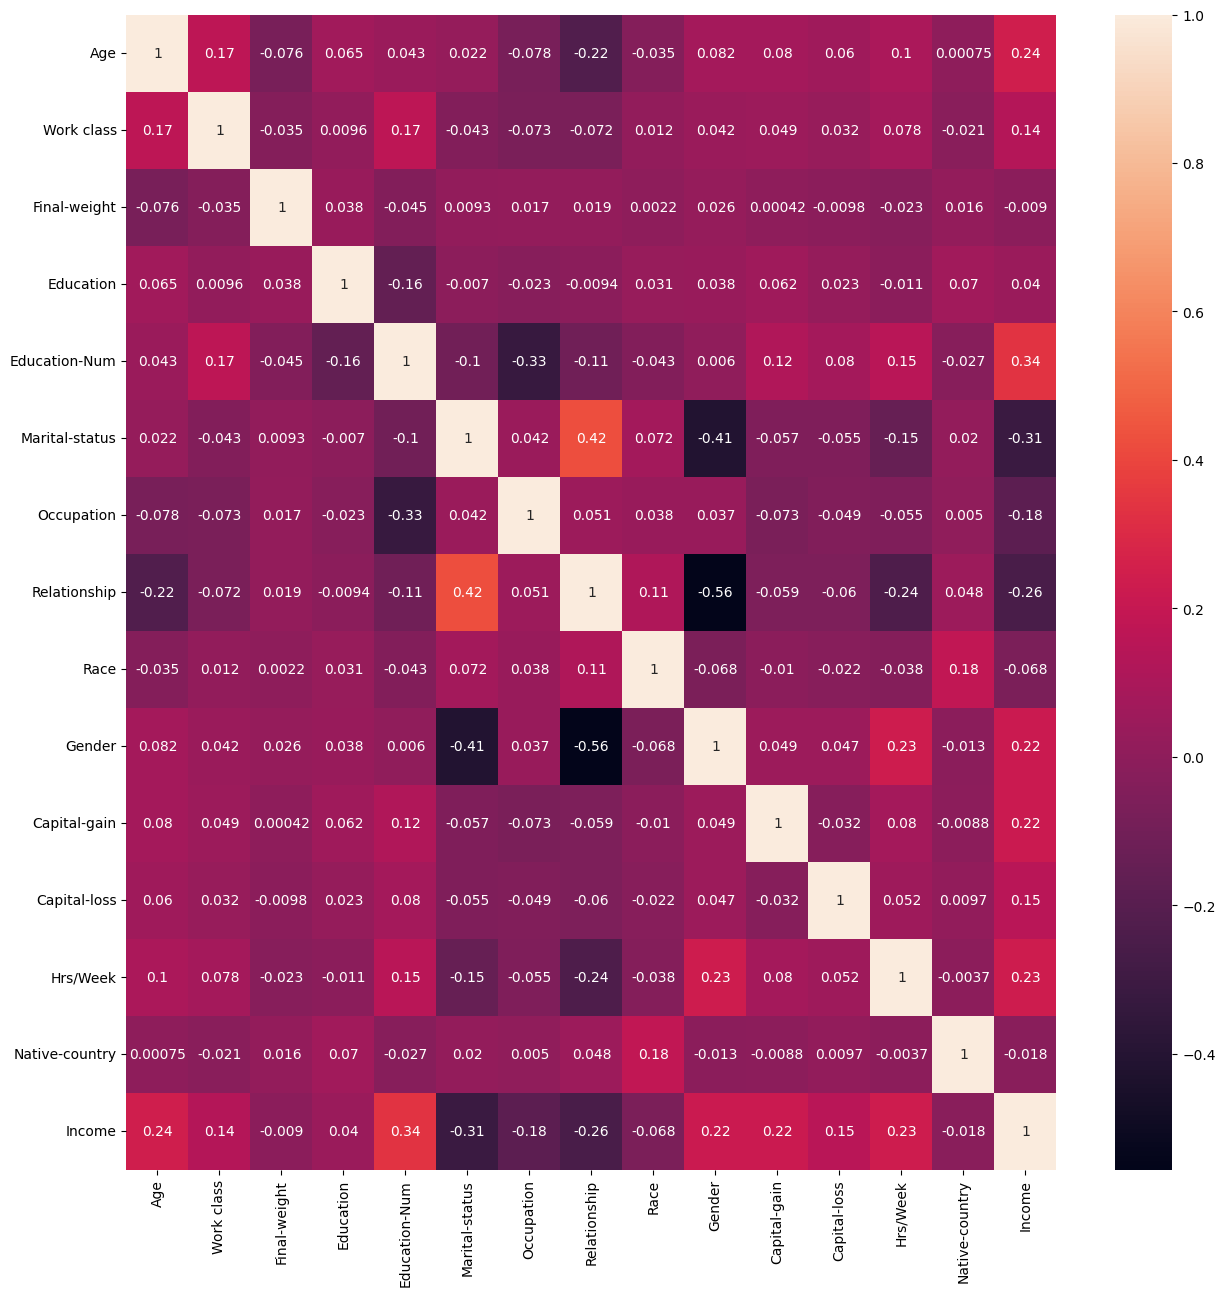

In [470]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [471]:
df.columns

Index(['Age', 'Work class', 'Final-weight', 'Education', 'Education-Num',
       'Marital-status', 'Occupation', 'Relationship', 'Race', 'Gender',
       'Capital-gain', 'Capital-loss', 'Hrs/Week', 'Native-country', 'Income'],
      dtype='object')

In [472]:
x = df[['Age', 'Work class', 'Final-weight', 'Education', 'Education-Num',
       'Marital-status', 'Occupation', 'Relationship', 'Race', 'Gender',
       'Capital-gain', 'Capital-loss', 'Hrs/Week', 'Native-country']]
y = df[['Income']]

In [473]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [474]:
logR = LogisticRegression()

In [475]:
dtc = DecisionTreeClassifier()

In [476]:
rfc = RandomForestClassifier()

In [477]:
logR.fit(x_train,y_train)

C:\Users\BHAWESH SINHA\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\BHAWESH SINHA\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [478]:
dtc.fit(x_train,y_train)

DecisionTreeClassifier()

In [479]:
y_pred_logR = logR.predict(x_test)

In [480]:
y_pred_dtc = dtc.predict(x_test)

In [481]:
dic = {'Model':['Logistic Regression','Decision Tree Classifier'],
      'Accuracy': [f'{int(accuracy_score(y_test,y_pred_logR)*100)} %',f'{int(accuracy_score(y_test,y_pred_dtc)*100)} %']}

In [482]:
accuracy = pd.DataFrame(dic)

In [483]:
accuracy

,Model,Accuracy
0,Logistic Regression,78 %
1,Decision Tree Classifier,80 %
